<a href="https://colab.research.google.com/github/xanasa14/MLImplementations/blob/master/NetflixVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import re
nf=pd.read_csv("/content/drive/MyDrive/Netflix/netflix_titles.csv")
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [30]:
nf.director.fillna("Unknown",inplace=True)
nf.dropna(inplace=True)
#nf.drop('show_id',axis=1)
nf.drop(columns=['show_id'])
nf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6643 entries, 0 to 7785
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6643 non-null   object
 1   type          6643 non-null   object
 2   title         6643 non-null   object
 3   director      6643 non-null   object
 4   cast          6643 non-null   object
 5   country       6643 non-null   object
 6   date_added    6643 non-null   object
 7   release_year  6643 non-null   int64 
 8   rating        6643 non-null   object
 9   duration      6643 non-null   object
 10  listed_in     6643 non-null   object
 11  description   6643 non-null   object
dtypes: int64(1), object(11)
memory usage: 674.7+ KB


In [31]:
nf.country=nf.country.apply(lambda x:x.split(",")).apply(lambda x:x[0])
nf.date_added=nf.date_added.apply(lambda x:dt.strptime(x.strip(),"%B %d, %Y"))
nf['year_added']=nf.date_added.dt.year
nf['month_added']=nf.date_added.dt.month
nf['day_added']=nf.date_added.dt.day

In [32]:
nf_movie=nf.loc[nf.type=="Movie",:]
nf_tv=nf.loc[nf.type=="TV Show",:]

In [33]:
nf.loc[nf.rating.isin(["TV-MA","R","NC-17"]),"rating"]="Adult"
nf.loc[nf.rating.isin(["TV-14","PG-13"]),"rating"]="Teen"
nf.loc[~nf.rating.isin(["Adult","Teen"]),"rating"]="All Ages"

Text(0.5, 1.0, 'US TV Show Genres')

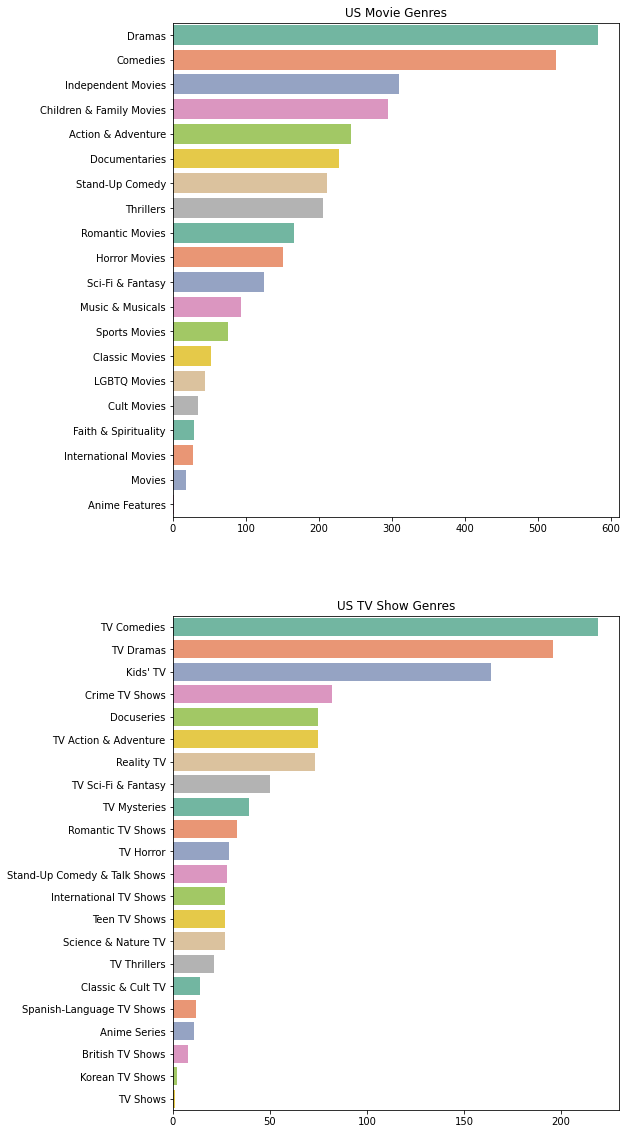

In [34]:
us_movie_genre_split=nf_movie.loc[nf_movie.country=="United States","listed_in"].apply(lambda x:x.split(","))
us_tv_genre_split=nf_tv.loc[nf_tv.country=="United States","listed_in"].apply(lambda x:x.split(","))

us_movie_genre_split.reset_index(inplace=True,drop=True)
us_movie_genre_list=[]
for count,value in enumerate(us_movie_genre_split):
    for count1,value1 in enumerate(us_movie_genre_split[count]):
        us_movie_genre_list.append(value1)


us_tv_genre_split.reset_index(inplace=True,drop=True)
us_tv_genre_list=[]
for count,value in enumerate(us_tv_genre_split):
    for count1,value1 in enumerate(us_tv_genre_split[count]):
        us_tv_genre_list.append(value1)
        

us_movie_genre_series=pd.Series(us_movie_genre_list)
us_movie_genre_series=us_movie_genre_series.apply(lambda x:x.strip())

us_tv_genre_series=pd.Series(us_tv_genre_list)
us_tv_genre_series=us_tv_genre_series.apply(lambda x:x.strip())


fig,axes=plt.subplots(2,1,figsize=(8,20))
sns.barplot(
    ax=axes[0],
    x=us_movie_genre_series.value_counts().values,
    y=us_movie_genre_series.value_counts().index,palette="Set2").set_title("US Movie Genres")
sns.barplot(
    ax=axes[1],
    x=us_tv_genre_series.value_counts().values,
    y=us_tv_genre_series.value_counts().index,palette="Set2").set_title("US TV Show Genres")

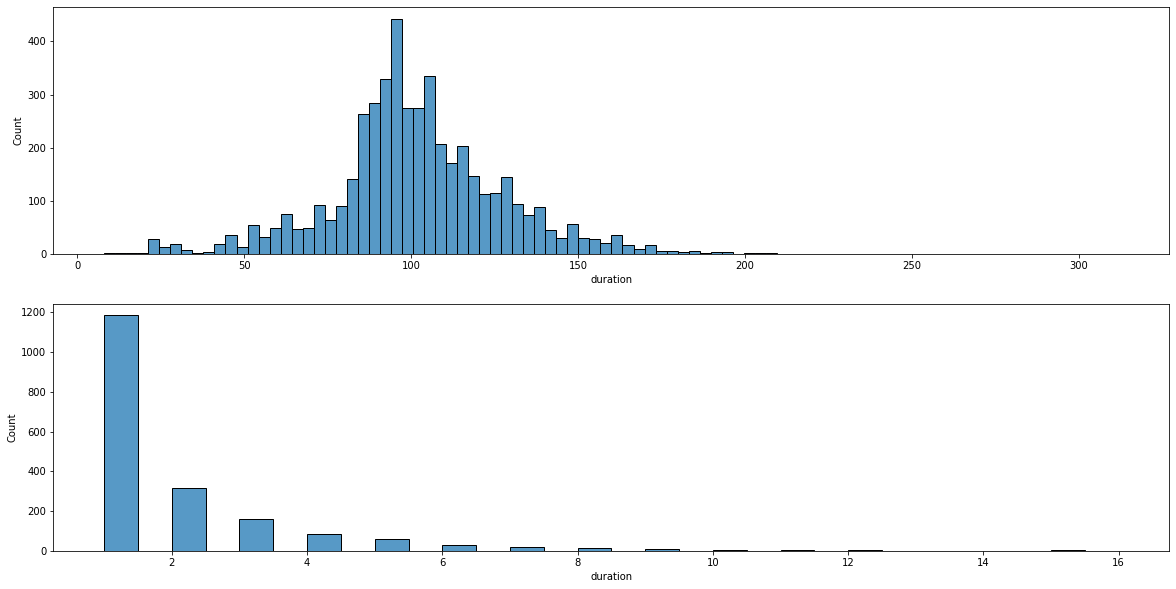

In [35]:
duration=nf.duration.apply(lambda x: x.split(" ")).apply(lambda x: x[0])
nf['duration']=duration

nf=nf.astype({"duration":'int64'})
fig,axes=plt.subplots(2,1,figsize=(20,10))
sns.histplot(ax=axes[0],data=nf.loc[nf.type=="Movie","duration"])
sns.histplot(ax=axes[1],data=nf.loc[nf.type=="TV Show","duration"],binwidth=.5)

Text(0.5, 1.0, 'US: Top 10 TV Show Directors')

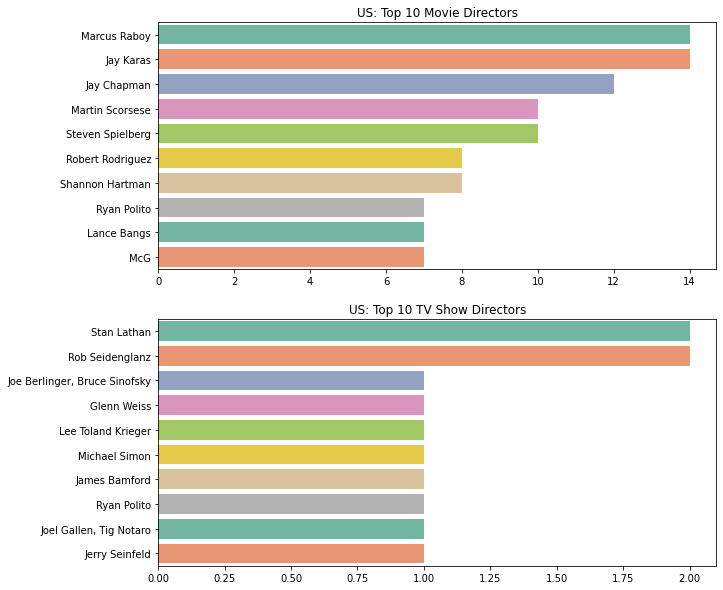

In [36]:
fig,axes=plt.subplots(2,1,figsize=(10,10))

sns.barplot(
    ax=axes[0],
    y=nf_movie.loc[(nf_movie.country=="United States") & (nf_movie.director!="Unknown"),"director"].value_counts().iloc[0:10].index,
    x=nf_movie.loc[(nf_movie.country=="United States") & (nf_movie.director!="Unknown"),"director"].value_counts().iloc[0:10].values,palette="Set2").set_title("US: Top 10 Movie Directors")
sns.barplot(
    ax=axes[1],
    y=nf_tv.loc[(nf_tv.country=="United States") & (nf_tv.director!="Unknown"),"director"].value_counts().iloc[0:10].index,
    x=nf_tv.loc[(nf_tv.country=="United States") & (nf_tv.director!="Unknown"),"director"].value_counts().iloc[0:10].values,palette="Set2").set_title("US: Top 10 TV Show Directors")

Text(0.5, 1.0, 'TV Show Ratings')

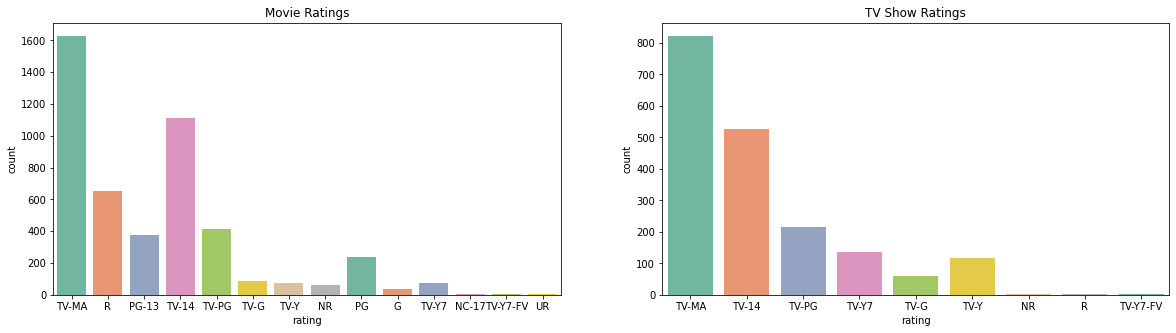

In [37]:
fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.countplot(ax=axes[0],x=nf_movie.rating,palette="Set2").set_title("Movie Ratings")
sns.countplot(ax=axes[1],x=nf_tv.rating,palette="Set2").set_title("TV Show Ratings")

Text(0.5, 1.0, 'TV Shows:Years Since Release')

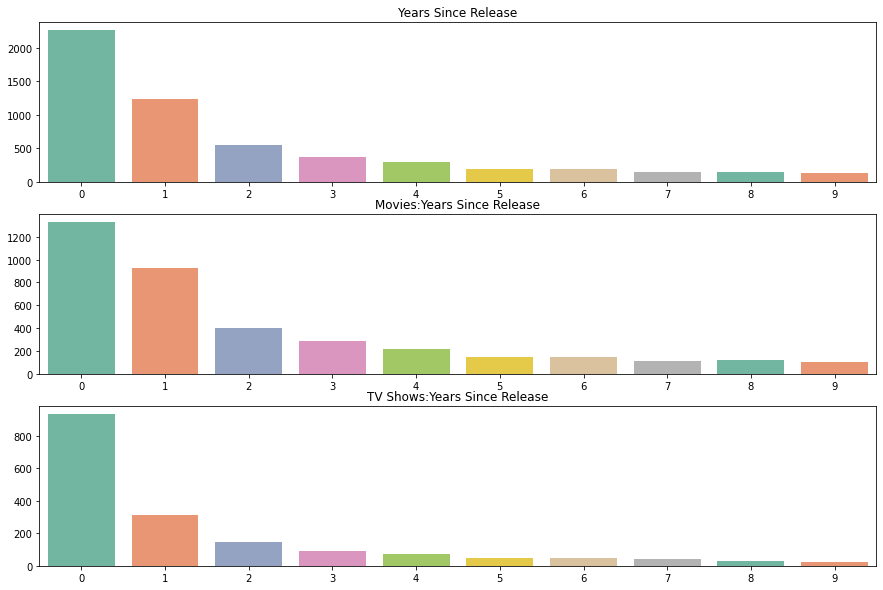

In [38]:
nf['release_added_diff']=nf.year_added-nf.release_year


fig,ax=plt.subplots(3,1,figsize=(15,10))
sns.barplot(ax=ax[0],
    x=nf.release_added_diff.value_counts().iloc[0:10].index,
    y=nf.release_added_diff.value_counts().iloc[0:10].values,palette="Set2").set_title("Years Since Release")
sns.barplot(ax=ax[1],
    x=nf.loc[nf.type=="Movie","release_added_diff"].value_counts().iloc[0:10].index,
    y=nf.loc[nf.type=="Movie","release_added_diff"].value_counts().iloc[0:10].values,palette="Set2").set_title("Movies:Years Since Release")
sns.barplot(ax=ax[2],
    x=nf.loc[nf.type=="TV Show","release_added_diff"].value_counts().iloc[0:10].index,
    y=nf.loc[nf.type=="TV Show","release_added_diff"].value_counts().iloc[0:10].values,palette="Set2").set_title("TV Shows:Years Since Release")

Text(0.5, 1.0, 'Top 10: Date Added for TV Shows')

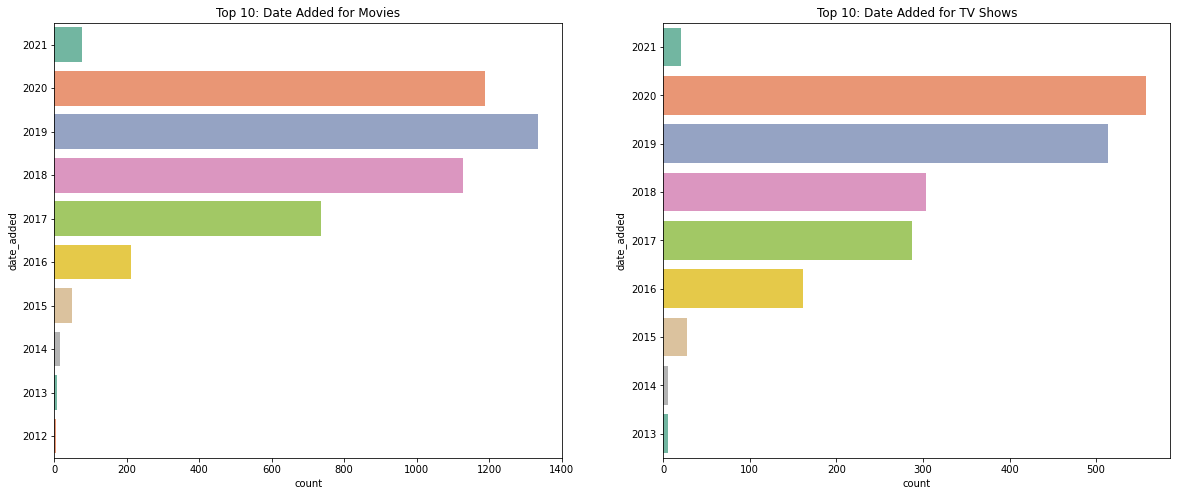

In [39]:
fig, axes = plt.subplots(1,2,figsize=(20,8))

sns.countplot(
    ax=axes[0],
    y=nf_movie.date_added.dt.year,
    order=nf_movie.date_added.dt.year.value_counts().sort_index(ascending=False).iloc[0:10].index,palette="Set2").set_title("Top 10: Date Added for Movies")
sns.countplot(
    ax=axes[1],
    y=nf_tv.date_added.dt.year,
    order=nf_tv.date_added.dt.year.value_counts().sort_index(ascending=False).iloc[0:10].index,palette="Set2").set_title("Top 10: Date Added for TV Shows")

Text(0.5, 1.0, 'Top 10 Release Years for TV Shows')

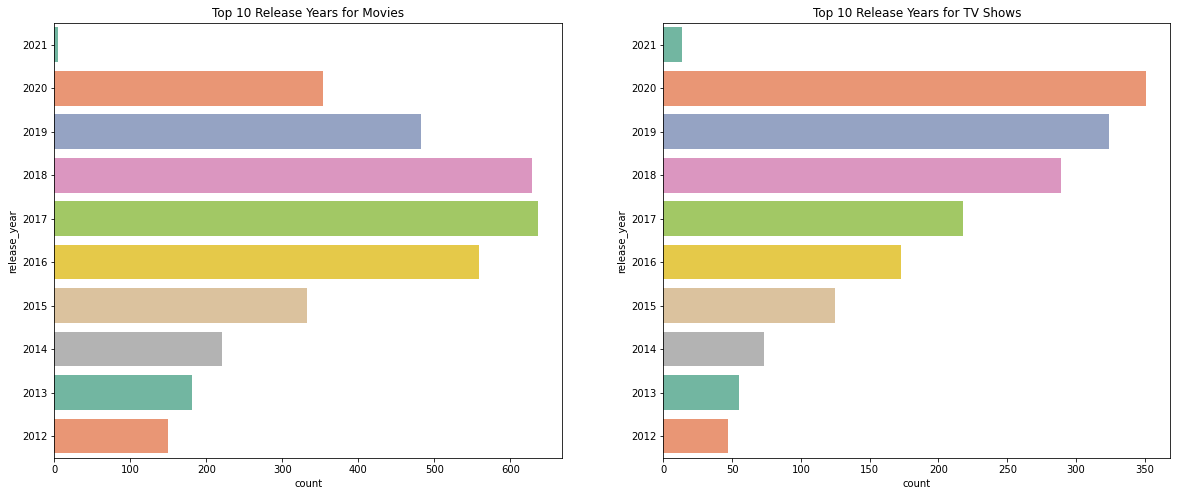

In [40]:
fig, axes = plt.subplots(1,2,figsize=(20,8))

sns.countplot(
    ax=axes[0],
    y=nf_movie.release_year,
    order=nf_movie.release_year.value_counts().sort_index(ascending=False).iloc[0:10].index,palette="Set2").set_title("Top 10 Release Years for Movies")
sns.countplot(
    ax=axes[1],
    y=nf_tv.release_year,
    order=nf_tv.release_year.value_counts().sort_index(ascending=False).iloc[0:10].index,palette="Set2").set_title("Top 10 Release Years for TV Shows")

Text(0.5, 1.0, 'Top 10 Countries for TV Shows')

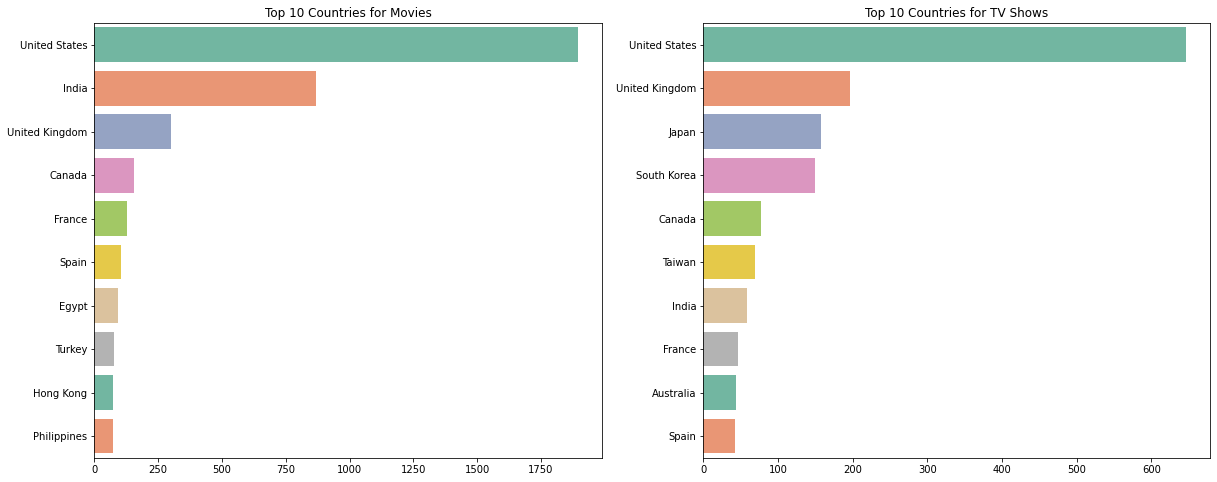

In [41]:
fig, axes = plt.subplots(1,2,figsize=(20,8))

sns.barplot(
    ax=axes[0],
    x=nf_movie.country.value_counts().head(10).values,
    y=nf_movie.country.value_counts().head(10).index,palette="Set2").set_title("Top 10 Countries for Movies")
sns.barplot(
    ax=axes[1],
    x=nf_tv.country.value_counts().head(10).values,
    y=nf_tv.country.value_counts().head(10).index,palette="Set2").set_title("Top 10 Countries for TV Shows")

Text(0.5, 1.0, 'US: Top 10 Cast Members for TV Shows')

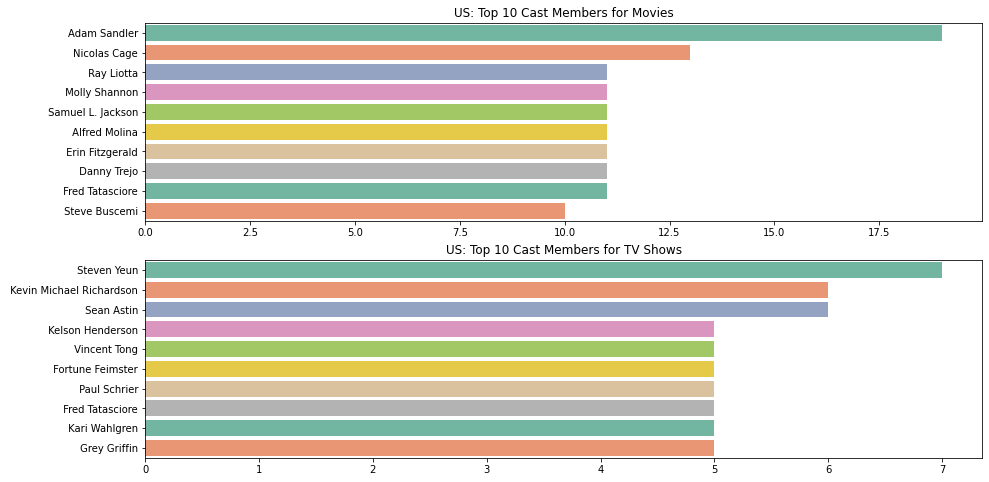

In [42]:
fig, axes = plt.subplots(2,1,figsize=(15,8))

us_movie_cast_split=nf_movie.cast[nf_movie.country=="United States"].apply(lambda x:x.split(","))
us_movie_cast_split.reset_index(inplace=True,drop=True)
us_movie_cast_list=[]
for count,value in enumerate(us_movie_cast_split):
    for count1,value1 in enumerate(us_movie_cast_split[count]):
        us_movie_cast_list.append(value1)
us_movie_cast_top_ten=pd.Series(us_movie_cast_list).value_counts().head(10)
sns.barplot(
    ax=axes[0],
    x=us_movie_cast_top_ten.values,
    y=us_movie_cast_top_ten.index,palette="Set2").set_title("US: Top 10 Cast Members for Movies")

us_tv_cast_split=nf_tv.cast[nf_tv.country=="United States"].apply(lambda x:x.split(","))
us_tv_cast_split.reset_index(inplace=True,drop=True)
us_tv_cast_list=[]
for count,value in enumerate(us_tv_cast_split):
    for count1,value1 in enumerate(us_tv_cast_split[count]):
        us_tv_cast_list.append(value1)
us_tv_cast_top_ten=pd.Series(us_tv_cast_list).value_counts().head(10)
sns.barplot(
    ax=axes[1],
    x=us_tv_cast_top_ten.values,
    y=us_tv_cast_top_ten.index,palette="Set2").set_title("US: Top 10 Cast Members for TV Shows")